In [60]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    channel = data['Channel']
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [61]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [62]:
# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler(with_mean=True, with_std=True)
# col_names = data.columns
# data = std_scaler.fit_transform(data)

In [63]:
data = pd.DataFrame(data, columns=col_names)

In [64]:
log_data = np.log(data)
#log_data= data

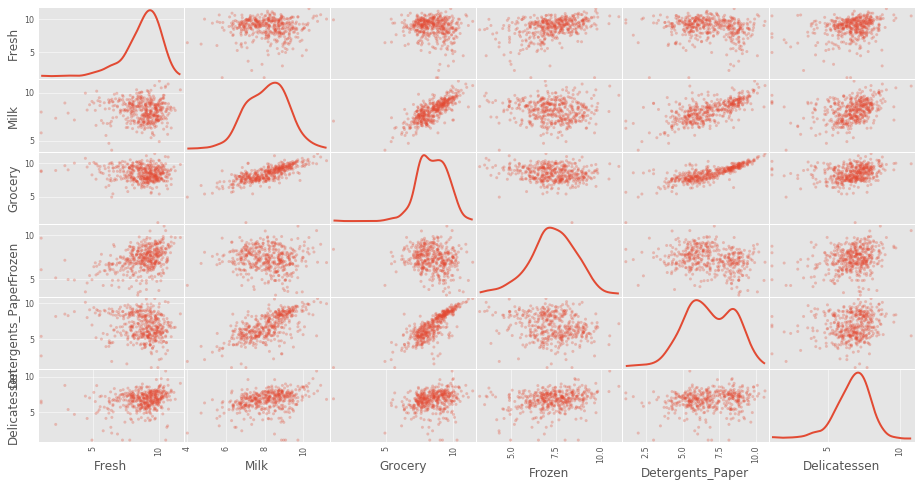

In [65]:
pd.plotting.scatter_matrix(log_data, alpha=0.3, figsize=(14, 8), diagonal='kde');

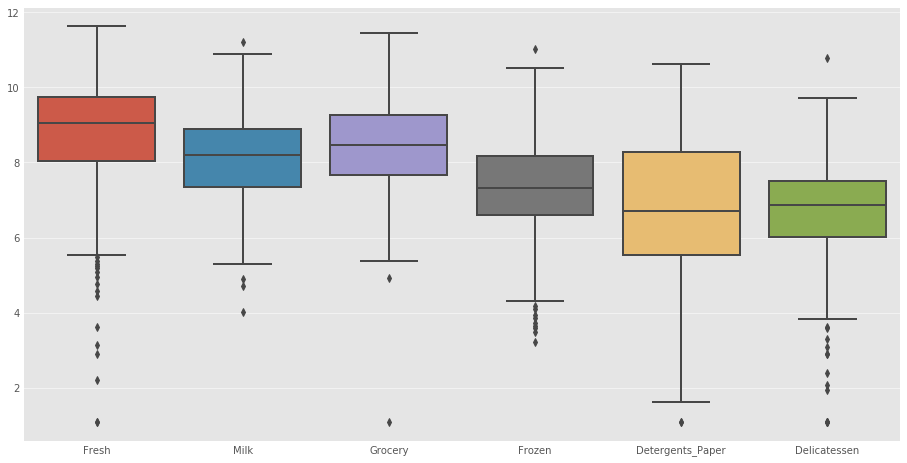

In [66]:
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.boxplot(data=log_data)

In [78]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(log_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(log_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_data.iloc[[100, 200, 300]])

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4424,0.1737,-0.3945,-0.4544,0.1722,-0.7455,-0.1494
Dimension 2,0.2766,-0.6851,-0.1624,-0.0694,-0.4877,-0.0419,-0.5097


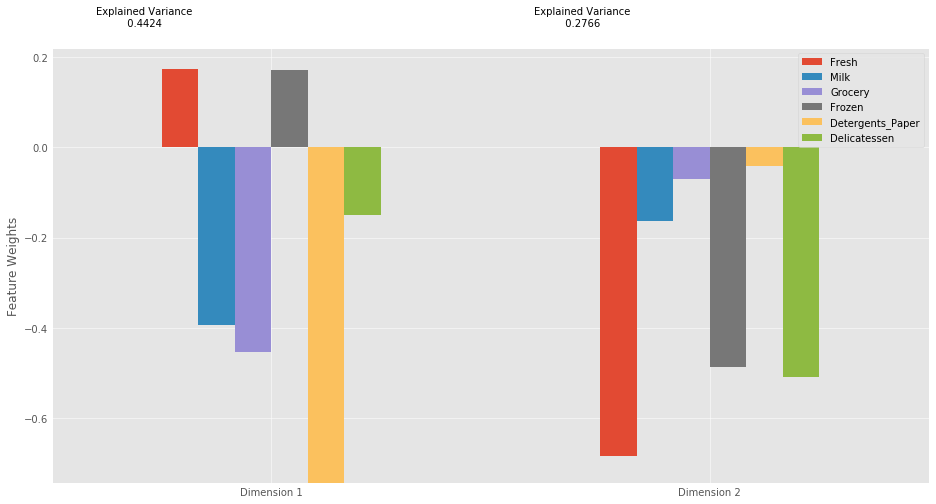

In [79]:
vs.pca_results(log_data, pca)

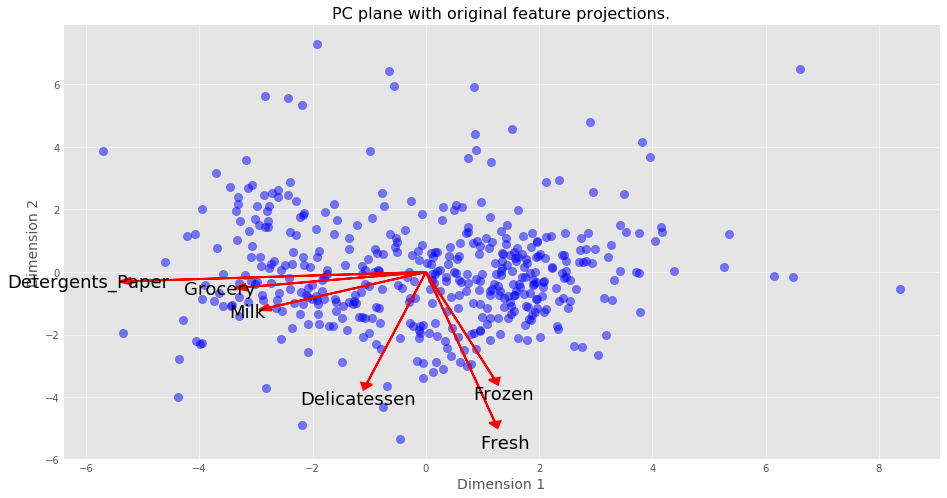

In [80]:
vs.biplot(log_data, reduced_data, pca)

### K-Means

In [81]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
clusterer = KMeans(n_clusters=2, random_state=100).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.labels_

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

In [82]:
for n_clst in range(2,100, 10):
    clusterer = KMeans(n_clusters=n_clst, random_state=100).fit(reduced_data)
    preds = clusterer.labels_
    score = silhouette_score(reduced_data, preds)
    print('n = {:3}, score = {:>4.2f}'.format(n_clst, score))

n =   2, score = 0.42
n =  12, score = 0.35
n =  22, score = 0.33
n =  32, score = 0.35
n =  42, score = 0.35
n =  52, score = 0.36
n =  62, score = 0.36
n =  72, score = 0.35
n =  82, score = 0.36
n =  92, score = 0.36


In [84]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=100).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.labels_

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

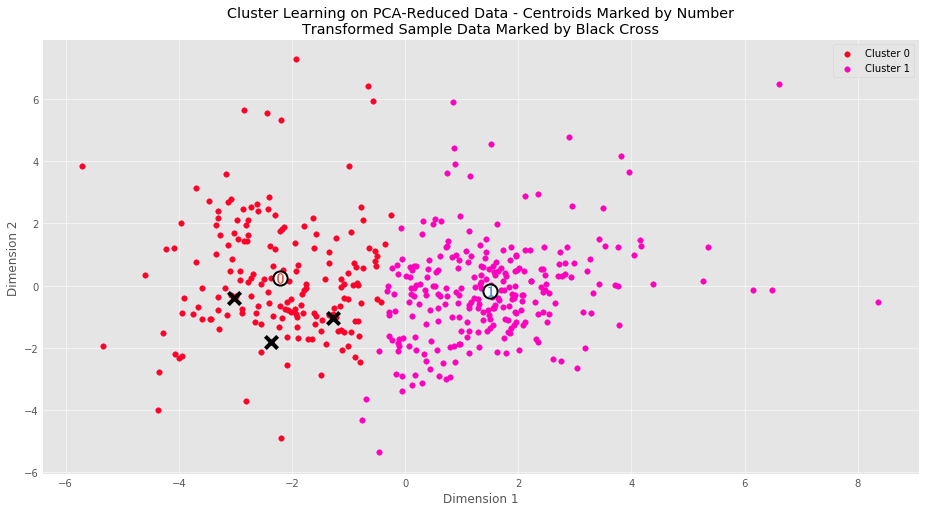

In [85]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### DBSCAN

In [130]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score

for eps in np.arange(0.3, 3, 0.2):
    for ms in [5, 10]:
        clusterer = DBSCAN(eps=eps, min_samples=ms).fit(reduced_data)
        preds = clusterer.labels_
        score = silhouette_score(reduced_data, preds)
        print('eps = {:3}, min_samples = {:2}, score = {:>4.2f}'.format(eps, ms, score))

eps = 0.3, min_samples =  5, score = -0.21
eps = 0.3, min_samples = 10, score = -0.35
eps = 0.5, min_samples =  5, score = -0.04
eps = 0.5, min_samples = 10, score = 0.08
eps = 0.7, min_samples =  5, score = 0.41
eps = 0.7, min_samples = 10, score = 0.35
eps = 0.9, min_samples =  5, score = 0.44
eps = 0.9, min_samples = 10, score = 0.42
eps = 1.1, min_samples =  5, score = 0.29
eps = 1.1, min_samples = 10, score = 0.45
eps = 1.3, min_samples =  5, score = 0.49
eps = 1.3, min_samples = 10, score = 0.47
eps = 1.5, min_samples =  5, score = 0.52
eps = 1.5, min_samples = 10, score = 0.49
eps = 1.7, min_samples =  5, score = 0.54
eps = 1.7, min_samples = 10, score = 0.52
eps = 1.9, min_samples =  5, score = 0.59
eps = 1.9, min_samples = 10, score = 0.52
eps = 2.1, min_samples =  5, score = 0.58
eps = 2.1, min_samples = 10, score = 0.55
eps = 2.3, min_samples =  5, score = 0.62
eps = 2.3, min_samples = 10, score = 0.57
eps = 2.5, min_samples =  5, score = 0.62
eps = 2.5, min_samples = 10, sc

In [153]:
clusterer = DBSCAN(eps=0.5, min_samples=15).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.labels_

# TODO: Find the cluster centers
#centers = clusterer.cluster_centers_

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

In [154]:
pd.crosstab(preds, 1)

col_0,1
row_0,
-1,238
0,44
1,158


In [155]:
db_data = reduced_data.assign(preds=preds)

In [156]:
db_data.head()

,Dimension 1,Dimension 2,preds
0,-1.750985,-0.070515,0
1,-1.800365,-0.869754,0
2,-1.893736,-1.676621,0
3,1.127313,-1.457982,1
4,-0.796711,-2.460866,-1


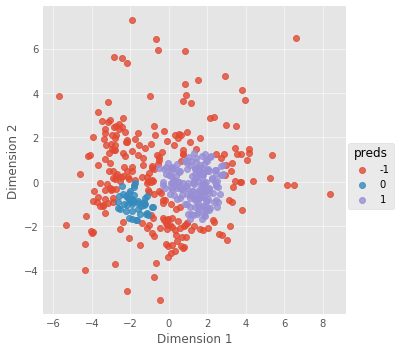

In [157]:
sns.lmplot('Dimension 1', 'Dimension 2', data=db_data,
          fit_reg=False, hue='preds')

### Gaussian Mixture Model

Automatically created module for IPython interactive environment


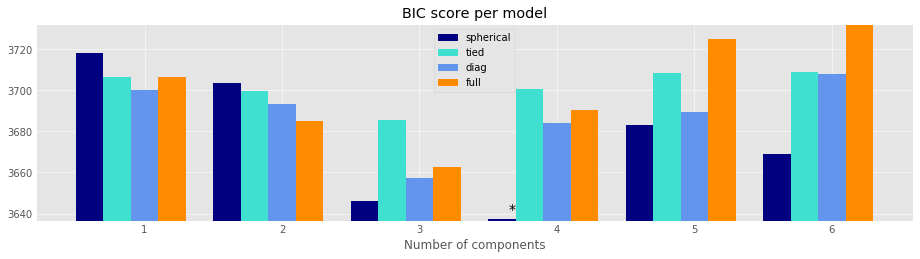

In [162]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
X = reduced_data

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(14,8))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [167]:
gmm = mixture.GaussianMixture(n_components=4, covariance_type='spherical')
gmm.fit(reduced_data)
preds = gmm.predict(reduced_data)

In [168]:
gmm_data = reduced_data.assign(preds=preds)

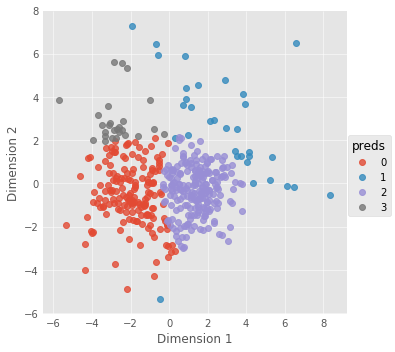

In [169]:
sns.lmplot('Dimension 1', 'Dimension 2', data=gmm_data,
          fit_reg=False, hue='preds')